In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df2=pd.read_csv("bbsr_y24.csv")

In [3]:
df2=df2[['Timestamp','PM2.5 (µg/m³)','PM10 (µg/m³)','NO (µg/m³)','NO2 (µg/m³)','CO (mg/m³)','Ozone (µg/m³)','NOx (ppb)','NH3 (µg/m³)']]

In [4]:
df2.head()


,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),NOx (ppb),NH3 (µg/m³)
0,2024-01-01 00:00:00,171.25,270.75,3.42,31.80,0.94,22.23,19.73,20.20
1,2024-01-01 01:00:00,170.50,248.75,4.13,40.67,0.93,10.70,24.97,19.37
2,2024-01-01 02:00:00,141.75,236.25,3.80,23.10,0.86,27.18,15.37,22.23
3,2024-01-01 03:00:00,122.50,196.00,2.88,18.52,0.81,29.75,12.20,20.35
4,2024-01-01 04:00:00,122.00,203.75,2.68,16.77,0.78,33.92,11.12,20.27


In [5]:
df2.isnull().sum()

Timestamp           0
PM2.5 (µg/m³)     497
PM10 (µg/m³)      362
NO (µg/m³)        319
NO2 (µg/m³)       966
CO (mg/m³)        349
Ozone (µg/m³)     136
NOx (ppb)         333
NH3 (µg/m³)      1066
dtype: int64

In [6]:
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])
df2 = df2.set_index('Timestamp').sort_index()

# --- PM2.5 and PM10: Interpolation (critical) ---
df2['PM2.5 (µg/m³)'] = df2['PM2.5 (µg/m³)'].interpolate(method='time').ffill().bfill()
df2['PM10 (µg/m³)']  = df2['PM10 (µg/m³)'].interpolate(method='time').ffill().bfill()

# --- NO, CO, NOx: forward/backward fill (short gaps) ---
for col in ['NO (µg/m³)','CO (mg/m³)','NOx (ppb)']:
    df2[col] = df2[col].ffill().bfill()

# --- NO2: interpolate (but keep large gaps NaN) ---
df2['NO2 (µg/m³)'] = df2['NO2 (µg/m³)'].interpolate(method='time')

# --- Ozone: simple ffill+bfill ---
df2['Ozone (µg/m³)'] = df2['Ozone (µg/m³)'].ffill().bfill()

# --- NH3: cautious fill (interpolation) ---
df2['NH3 (µg/m³)'] = df2['NH3 (µg/m³)'].interpolate(method='time')

In [7]:
df2.isnull().sum()

PM2.5 (µg/m³)    0
PM10 (µg/m³)     0
NO (µg/m³)       0
NO2 (µg/m³)      0
CO (mg/m³)       0
Ozone (µg/m³)    0
NOx (ppb)        0
NH3 (µg/m³)      0
dtype: int64

In [8]:
df2.describe()

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),NOx (ppb),NH3 (µg/m³)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,41.146010,90.936607,1.681018,11.462898,0.974159,53.932966,7.276038,8.361572
std,38.671994,72.511453,3.676411,12.331689,1.098602,37.400866,8.430732,7.440952
min,1.000000,1.000000,0.100000,0.100000,0.000000,0.200000,0.000000,0.100000
25%,12.500000,39.250000,0.480000,3.970000,0.400000,25.777500,2.950000,3.970000
50%,28.500000,74.000000,0.980000,8.050000,0.630000,43.855000,5.120000,6.380000
75%,58.806429,124.000000,1.950000,14.850000,1.260000,75.172500,9.150000,12.180000
max,657.000000,921.000000,123.050000,160.050000,9.560000,199.400000,115.050000,119.800000


In [9]:
print(df2.index.duplicated().sum()) #checking duplicate timestamps

0


In [10]:
for col in df2.columns:                 #outlier detection
    print(col, "Min:", df2[col].min(), "Max:", df2[col].max())

PM2.5 (µg/m³) Min: 1.0 Max: 657.0
PM10 (µg/m³) Min: 1.0 Max: 921.0
NO (µg/m³) Min: 0.1 Max: 123.05
NO2 (µg/m³) Min: 0.1 Max: 160.05
CO (mg/m³) Min: 0.0 Max: 9.56
Ozone (µg/m³) Min: 0.2 Max: 199.4
NOx (ppb) Min: 0.0 Max: 115.05
NH3 (µg/m³) Min: 0.1 Max: 119.8


In [11]:
print(df2.shape[0])           #since it's a leap year, we got 8784 

8784


<Axes: title={'center': 'PM2.5 over 2024'}, xlabel='Timestamp'>

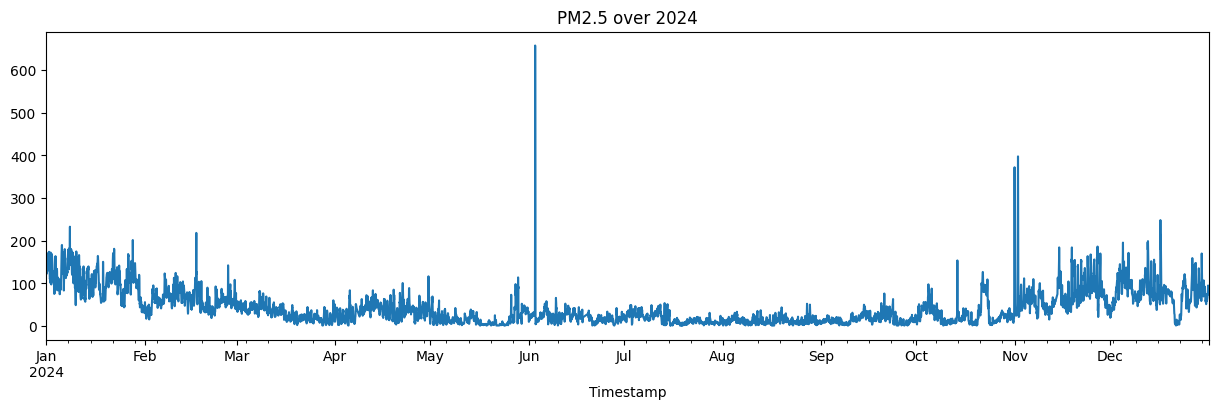

In [12]:
df2['PM2.5 (µg/m³)'].plot(figsize=(15,4), title="PM2.5 over 2024")

#the trends look quite realistic and there are some spikes which might be due to faulty sensors

In [13]:
print(df2.corr())  #strong correlation between pm2.5 and pm10 shows that the data is reasonable and realistic.

               PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
PM2.5 (µg/m³)       1.000000      0.737772    0.285210     0.581061   
PM10 (µg/m³)        0.737772      1.000000    0.298154     0.532614   
NO (µg/m³)          0.285210      0.298154    1.000000     0.478641   
NO2 (µg/m³)         0.581061      0.532614    0.478641     1.000000   
CO (mg/m³)          0.187350      0.189551    0.100252     0.067538   
Ozone (µg/m³)       0.336912      0.246786   -0.125698    -0.052712   
NOx (ppb)           0.563403      0.495392    0.726661     0.900817   
NH3 (µg/m³)         0.522288      0.399133    0.172824     0.428804   

               CO (mg/m³)  Ozone (µg/m³)  NOx (ppb)  NH3 (µg/m³)  
PM2.5 (µg/m³)    0.187350       0.336912   0.563403     0.522288  
PM10 (µg/m³)     0.189551       0.246786   0.495392     0.399133  
NO (µg/m³)       0.100252      -0.125698   0.726661     0.172824  
NO2 (µg/m³)      0.067538      -0.052712   0.900817     0.428804  
CO (mg/m³)       1.000000

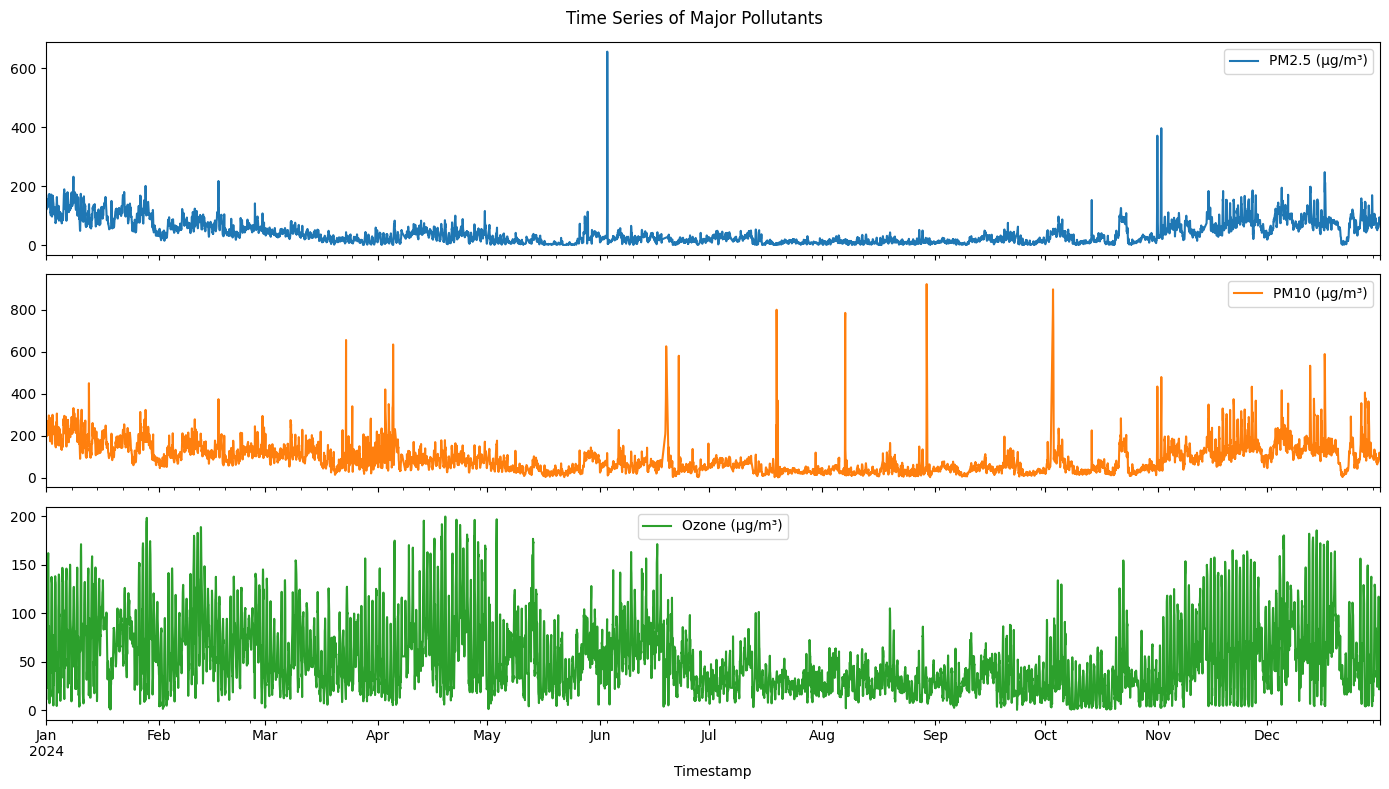

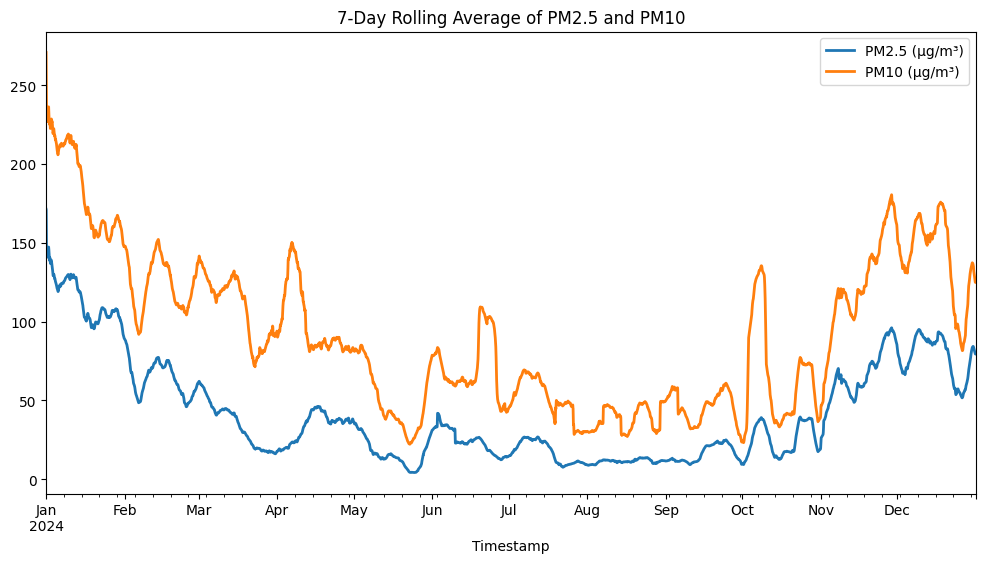

In [14]:
#TIME SERIES TRENDS OF POLLUTANTS
# Plot pollutants over time
df2[["PM2.5 (µg/m³)", "PM10 (µg/m³)", "Ozone (µg/m³)"]].plot(subplots=True, figsize=(14,8), title="Time Series of Major Pollutants")
plt.tight_layout()
plt.show()   

#insights:
#PM2.5 & PM10 show frequent spikes, especially in winter (Jan, Nov–Dec) and a few extreme outliers around mid-year.
#Ozone behaves differently: relatively high in summer months (Apr–Jun) due to photochemical reactions, lower during monsoon.
#Strong seasonality is visible → particulate matter worsens in cooler months, ozone worsens in hotter months.

# Rolling average (7-day smoothing)
df_rolling = df2.rolling("7D").mean()
df_rolling[["PM2.5 (µg/m³)", "PM10 (µg/m³)"]].plot(figsize=(12,6), linewidth=2)
plt.title("7-Day Rolling Average of PM2.5 and PM10")
plt.show()

#Both pollutants decline steadily after January, hitting lowest levels around July–September (monsoon season) due to rain washing pollutants out.
#Sharp rise again in Oct–Dec, aligning with post-monsoon stagnation and winter inversion layers.
#PM10 is consistently higher than PM2.5, but they follow the same seasonal curve → indicating common sources (traffic, dust, construction).

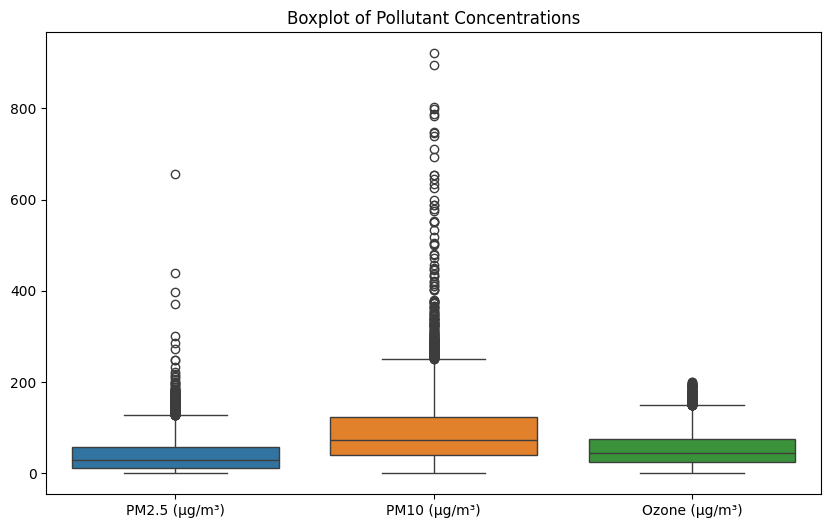

In [15]:

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df2[["PM2.5 (µg/m³)", "PM10 (µg/m³)", "Ozone (µg/m³)"]])
plt.title("Boxplot of Pollutant Concentrations")
plt.show()

#PM10 has the largest spread and most extreme outliers.
#PM2.5 also has many spikes but within a narrower range.
#Ozone is more stable compared to particulates.


In [16]:
#Considering the outlier days with spikes and getting probable reasons.
# Resample daily mean (if your data is hourly/minute level)
daily_mean = df2.resample("D").mean()

# Z-score method (outliers = > |3|)
z_scores = (daily_mean - daily_mean.mean()) / daily_mean.std()
outlier_days = daily_mean[(np.abs(z_scores) > 3).any(axis=1)]

print("Outlier days:")
print(outlier_days.index)


Outlier days:
DatetimeIndex(['2024-01-01', '2024-01-08', '2024-01-24', '2024-01-25',
               '2024-01-27', '2024-04-10', '2024-04-16', '2024-04-17',
               '2024-04-18', '2024-04-27', '2024-05-07', '2024-05-30',
               '2024-05-31', '2024-06-19', '2024-10-03', '2024-10-04',
               '2024-10-08', '2024-11-01', '2024-11-18', '2024-11-21',
               '2024-11-23', '2024-11-26', '2024-12-13', '2024-12-16',
               '2024-12-27', '2024-12-28'],
              dtype='datetime64[ns]', name='Timestamp', freq=None)


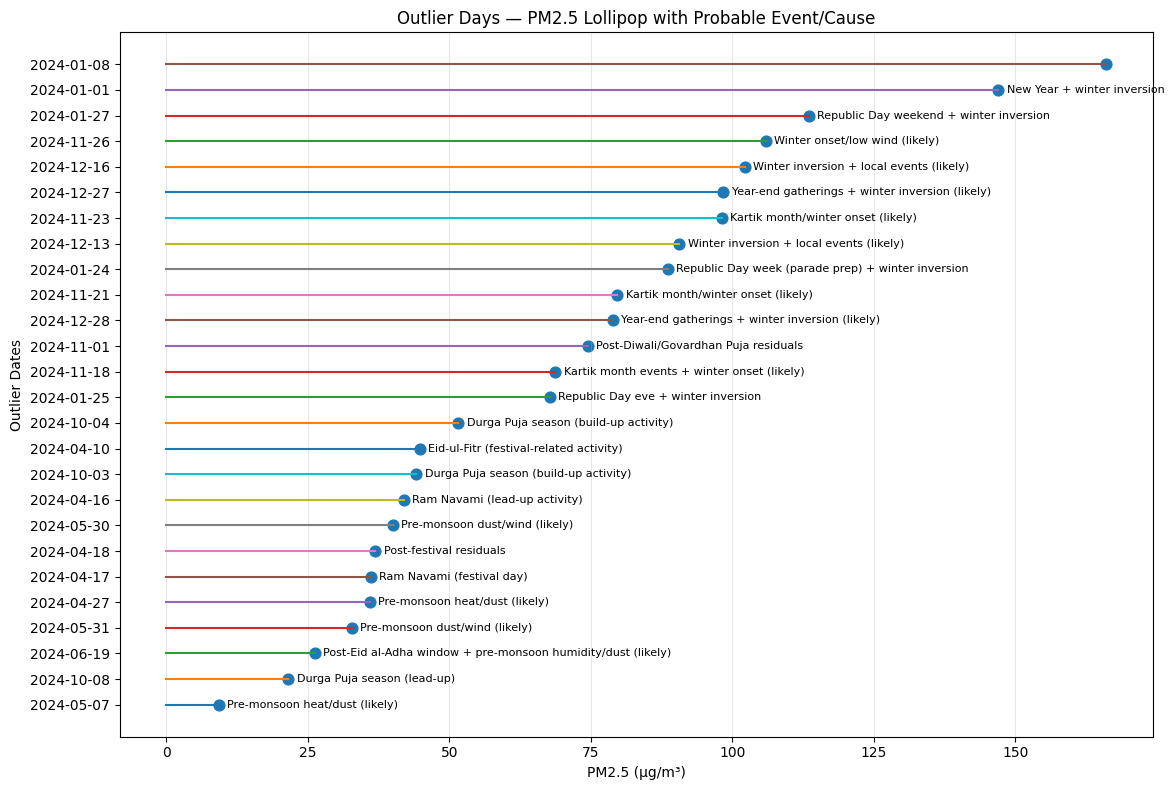

In [19]:

# Daily averages (keeps original units)
daily = df2.resample("D").mean()

# Your exact outlier dates (from your message)
outlier_dates = pd.to_datetime([
    "2024-01-01","2024-01-08","2024-01-24","2024-01-25","2024-01-27",
    "2024-04-10","2024-04-16","2024-04-17","2024-04-18","2024-04-27",
    "2024-05-07","2024-05-30","2024-05-31","2024-06-19",
    "2024-10-03","2024-10-04","2024-10-08",
    "2024-11-01","2024-11-18","2024-11-21","2024-11-23","2024-11-26",
    "2024-12-13","2024-12-16","2024-12-27","2024-12-28"
])

# ---------- 1) Specific event mapping (curated & cautious) ----------
# Notes:
# - Festival dates can vary locally by a day (moon-sighting). Labels below are *probable*.

event_map = {
    # Jan: winter + holidays
    "2024-01-01": "New Year + winter inversion",
    "2024-01-24": "Republic Day week (parade prep) + winter inversion",
    "2024-01-25": "Republic Day eve + winter inversion",
    "2024-01-27": "Republic Day weekend + winter inversion",

    # April: major festivals
    "2024-04-10": "Eid-ul-Fitr (festival-related activity)",
    "2024-04-16": "Ram Navami (lead-up activity)",
    "2024-04-17": "Ram Navami (festival day)",
    "2024-04-18": "Post-festival residuals",
    "2024-04-27": "Pre-monsoon heat/dust (likely)",

    # May/June: pre-monsoon dust/heat; (Eid al-Adha was ~Jun 17 in 2024)
    "2024-05-07": "Pre-monsoon heat/dust (likely)",
    "2024-05-30": "Pre-monsoon dust/wind (likely)",
    "2024-05-31": "Pre-monsoon dust/wind (likely)",
    "2024-06-19": "Post-Eid al-Adha window + pre-monsoon humidity/dust (likely)",

    # Oct: Durga Puja/Dussehra season (2024 main days early–mid Oct)
    "2024-10-03": "Durga Puja season (build-up activity)",
    "2024-10-04": "Durga Puja season (build-up activity)",
    "2024-10-08": "Durga Puja season (lead-up)",

    # Diwali (Oct 31, 2024) & after
    "2024-11-01": "Post-Diwali/Govardhan Puja residuals",

    # Nov: winter onset + Kartik month activities in Odisha (Boita Bandana/Kartik Purnima mid-Nov)
    "2024-11-18": "Kartik month events + winter onset (likely)",
    "2024-11-21": "Kartik month/winter onset (likely)",
    "2024-11-23": "Kartik month/winter onset (likely)",
    "2024-11-26": "Winter onset/low wind (likely)",

    # Dec: winter inversion; local fairs, weddings, year-end events
    "2024-12-13": "Winter inversion + local events (likely)",
    "2024-12-16": "Winter inversion + local events (likely)",
    "2024-12-27": "Year-end gatherings + winter inversion (likely)",
    "2024-12-28": "Year-end gatherings + winter inversion (likely)",
}

outliers_df = daily.loc[outlier_dates.intersection(daily.index)].copy()
outliers_df["Event/Cause"] = [
    event_map.get(d.date().isoformat(), None) for d in outliers_df.index
]
# -------- PLOT B: Lollipop chart of outliers (sorted by PM2.5) ----------
plot_df = outliers_df.sort_values("PM2.5 (µg/m³)", ascending=True)
x = plot_df["PM2.5 (µg/m³)"].values
y = plot_df.index.strftime("%Y-%m-%d")

plt.figure(figsize=(12,8))
# stems
for xi, yi in zip(x, y):
    plt.plot([0, xi], [yi, yi], lw=1.5)
# markers
plt.scatter(x, y, s=60)

# text labels (event/cause) on the right side
for xi, yi, txt in zip(x, y, plot_df["Event/Cause"]):
    plt.annotate(txt, (xi, yi), xytext=(6, 0), textcoords="offset points", va="center", fontsize=8)

plt.title("Outlier Days — PM2.5 Lollipop with Probable Event/Cause")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Outlier Dates")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()



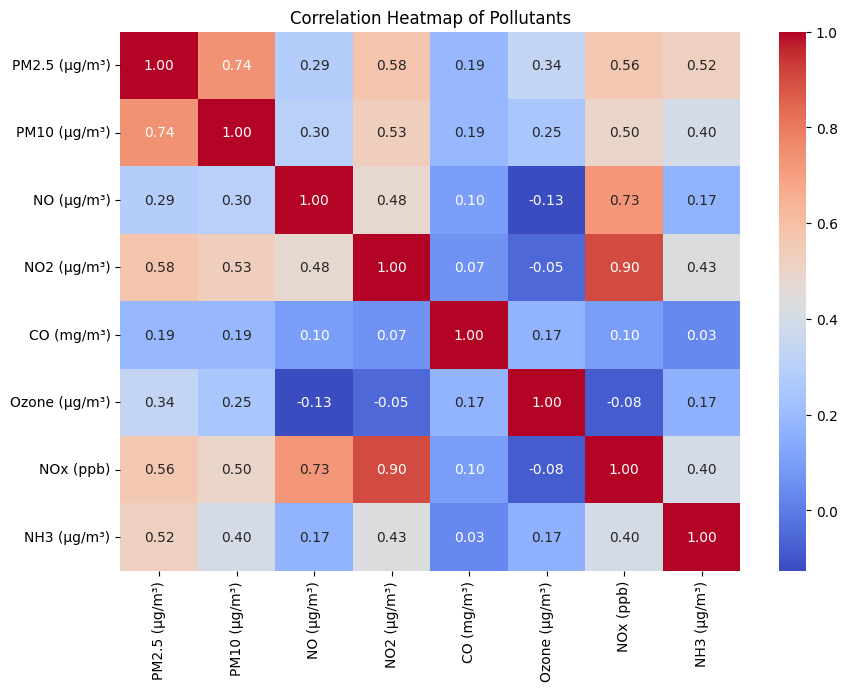

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Pollutants")
plt.show()

#PM2.5 and PM10 are highly correlated (0.74) → common sources.
#NO2 strongly correlates with NOx (0.90) → expected since NOx includes NO + NO2.
#Ozone is weakly or negatively correlated with NO, NO2, NOx → consistent with photochemical ozone chemistry (NOx destroys ozone at night, sunlight helps form it).
#NH3 moderately correlates with PM2.5/NO2 → possible role in secondary particle formation (ammonium salts).
 

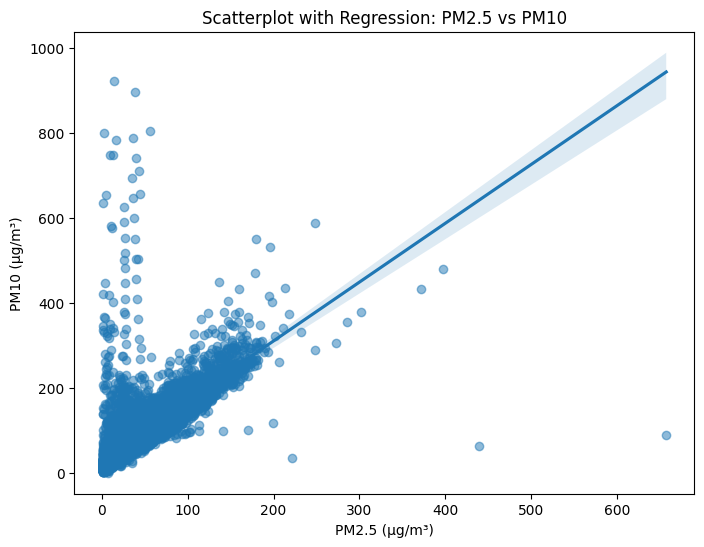

In [21]:
# Top correlation pair: PM2.5 vs PM10
top_corr = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

#simple scatterplot with regression line
plt.figure(figsize=(8,6))
sns.regplot(data=df2, x='PM2.5 (µg/m³)', y='PM10 (µg/m³)', scatter_kws={'alpha':0.5})
plt.title("Scatterplot with Regression: PM2.5 vs PM10")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("PM10 (µg/m³)")
plt.show()


#Scatter points (dots):
#Each dot represents one day’s measurements (PM2.5 value on x-axis, PM10 value on y-axis).
#If the dots cluster around a diagonal line, it means when PM2.5 is high, PM10 is also high (strong positive correlation).
#If they’re scattered randomly, it means weak or no correlation.
#Blue regression line:
#Seaborn fits a linear regression (y = m·x + c).
#A steep upward slope → strong positive relationship.
#A flat line → weak or no relationship.
#A downward slope → negative relationship.
#Shaded region:
#This is the confidence interval for the regression line (by default 95%). It shows the uncertainty in the fit.

C:\Users\kruti\AppData\Local\Temp\ipykernel_4756\1981064263.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hour", y="PM2.5 (µg/m³)", data=df2, ci=None, marker="o")


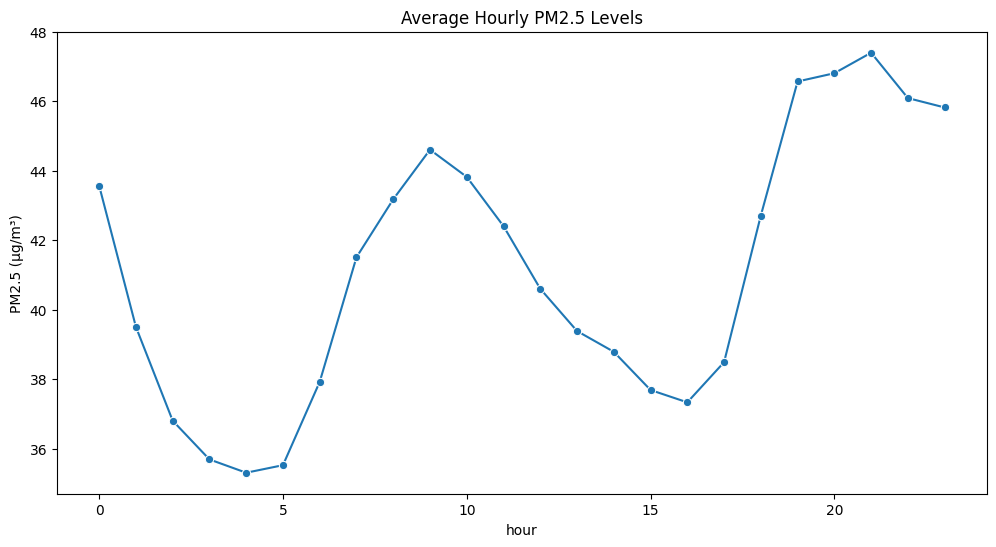

C:\Users\kruti\AppData\Local\Temp\ipykernel_4756\1981064263.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hour", y="Ozone (µg/m³)", data=df2, ci=None, marker="o")


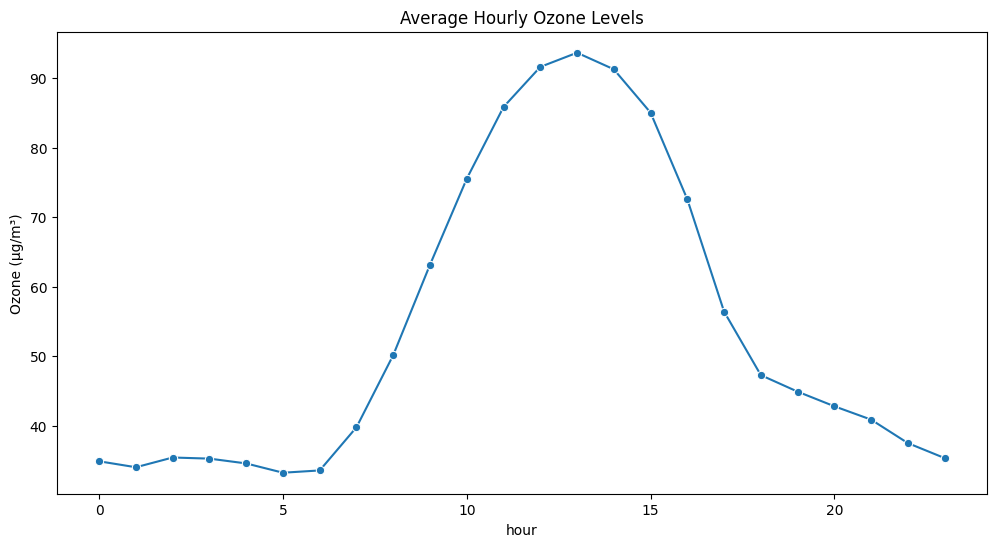

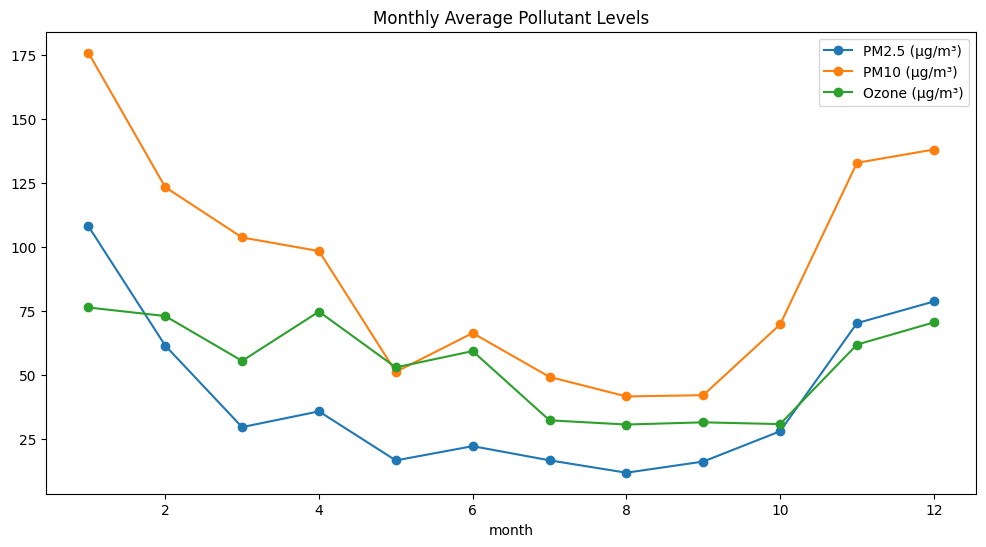

In [22]:
# Add time-based features
df2["hour"] = df2.index.hour
df2["month"] = df2.index.month
df2["dayofweek"] = df2.index.dayofweek

# Average pollutant by hour
plt.figure(figsize=(12,6))
sns.lineplot(x="hour", y="PM2.5 (µg/m³)", data=df2, ci=None, marker="o")
plt.title("Average Hourly PM2.5 Levels")  #Clear bimodal pattern → peak in morning (9–11 AM, traffic) and late evening/night (8–11 PM, cooking, traffic, stagnant air).
                                           #Lowest levels in early morning (4–6 AM), before traffic starts.
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x="hour", y="Ozone (µg/m³)", data=df2, ci=None, marker="o")
plt.title("Average Hourly Ozone Levels")      #peak in the afternoon due to (sunlight).
plt.show()

# Average pollutant by month
monthly_avg = df2.groupby("month")[["PM2.5 (µg/m³)", "PM10 (µg/m³)", "Ozone (µg/m³)"]].mean()
monthly_avg.plot(marker="o", figsize=(12,6))
plt.title("Monthly Average Pollutant Levels")
plt.show()


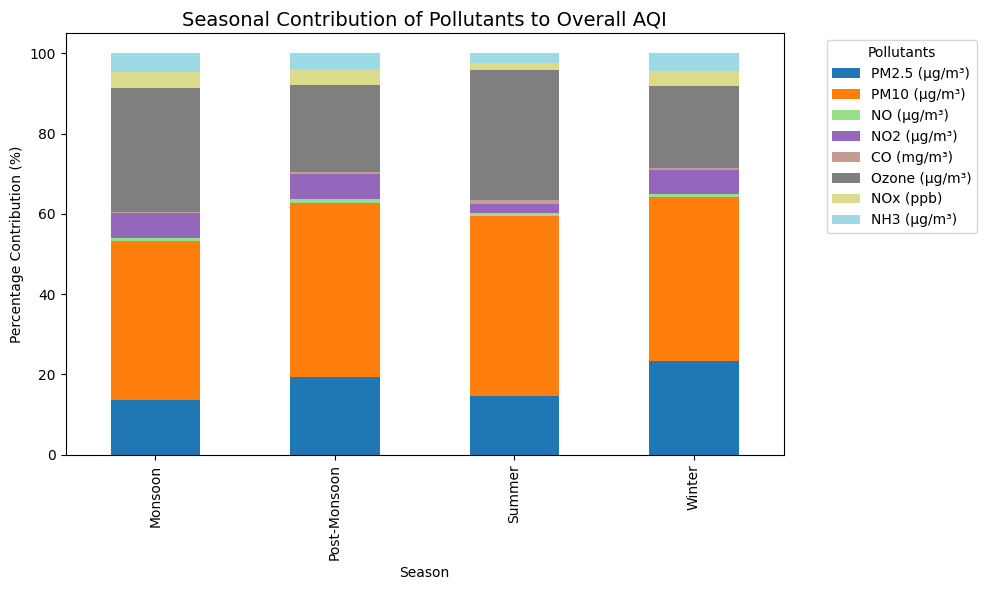

In [23]:
# Make a copy to avoid messing with original df
df = df2.copy()

# Extract seasons from Timestamp index
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 9]:
        return "Monsoon"
    else:
        return "Post-Monsoon"

df['Season'] = df.index.month.map(get_season)

# Select pollutants
pollutants = ['PM2.5 (µg/m³)','PM10 (µg/m³)','NO (µg/m³)',
              'NO2 (µg/m³)','CO (mg/m³)','Ozone (µg/m³)',
              'NOx (ppb)','NH3 (µg/m³)']

# Aggregate by season (mean contribution)
seasonal_pollutants = df.groupby('Season')[pollutants].mean()

# Normalize each season so bars show % contribution
seasonal_percent = seasonal_pollutants.div(seasonal_pollutants.sum(axis=1), axis=0) * 100

# Plot stacked bar
seasonal_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

plt.title("Seasonal Contribution of Pollutants to Overall AQI", fontsize=14)
plt.ylabel("Percentage Contribution (%)")
plt.xlabel("Season")
plt.legend(title="Pollutants", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


#PM10 + PM2.5 together make up ~65–70% of total AQI contributors in every season → particulate matter pollution is the primary driver of air quality deterioration in Bhubaneswar.
#Seasonal events (Diwali, stubble burning, winter inversion) make Winter and Post-Monsoon especially worse.

In [27]:

df2.info()
df2.describe()

#the data seems clean enough to be used in POWER BI

dff=df2.copy()
dff.to_csv("bbsr_air24.csv", index=False)
print("Saved bbsr_air_2024_powerbi.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2024-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM2.5 (µg/m³)  8784 non-null   float64
 1   PM10 (µg/m³)   8784 non-null   float64
 2   NO (µg/m³)     8784 non-null   float64
 3   NO2 (µg/m³)    8784 non-null   float64
 4   CO (mg/m³)     8784 non-null   float64
 5   Ozone (µg/m³)  8784 non-null   float64
 6   NOx (ppb)      8784 non-null   float64
 7   NH3 (µg/m³)    8784 non-null   float64
 8   hour           8784 non-null   int32  
 9   month          8784 non-null   int32  
 10  dayofweek      8784 non-null   int32  
dtypes: float64(8), int32(3)
memory usage: 720.6 KB
Saved bbsr_air_2024_powerbi.csv
